In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
fashion_mnist=keras.datasets.fashion_mnist

In [4]:
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Data reshape

In [6]:
X_train_full=X_train_full.reshape((60000,28,28,1))
X_test=X_test.reshape((10000,28,28,1))
#adding another channel to make four dimension for cnn

Data Normalization



we then normalize the data dimension so that they are of approximately same scale

In [7]:
X_train_n=X_train_full/255.
X_test_n=X_test/255.

Splitting the data

In [8]:
X_valid,X_train=X_train_n[:5000],X_train_n[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test_n

Create The Model Architecture

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='ReLU',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation='ReLU'))
model.add(keras.layers.Dense(100,activation='ReLU'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [12]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [13]:
model_history=model.fit(X_train,y_train,epochs=10,batch_size=64,validation_data=(X_valid,y_valid))

Epoch 1/10
860/860 [==============================] - 19s 21ms/step - loss: 0.8719 - accuracy: 0.7034 - val_loss: 0.8239 - val_accuracy: 0.7046
Epoch 2/10
860/860 [==============================] - 17s 20ms/step - loss: 0.5545 - accuracy: 0.7987 - val_loss: 0.4956 - val_accuracy: 0.8154
Epoch 3/10
860/860 [==============================] - 17s 20ms/step - loss: 0.4937 - accuracy: 0.8213 - val_loss: 1.0059 - val_accuracy: 0.6880
Epoch 4/10
860/860 [==============================] - 17s 20ms/step - loss: 0.4550 - accuracy: 0.8385 - val_loss: 0.4208 - val_accuracy: 0.8558
Epoch 5/10
860/860 [==============================] - 17s 20ms/step - loss: 0.4289 - accuracy: 0.8464 - val_loss: 0.4265 - val_accuracy: 0.8492
Epoch 6/10
860/860 [==============================] - 18s 21ms/step - loss: 0.4040 - accuracy: 0.8553 - val_loss: 0.3824 - val_accuracy: 0.8682
Epoch 7/10
860/860 [==============================] - 17s 20ms/step - loss: 0.3862 - accuracy: 0.8624 - val_loss: 0.3997 - val_accuracy:

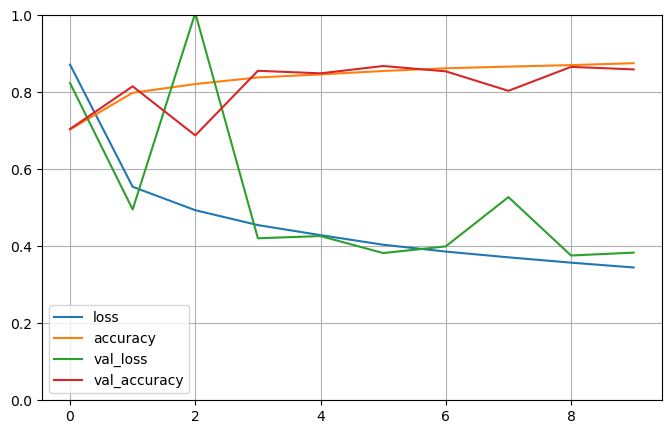

In [14]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
ev=model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4169 - accuracy: 0.8436


In [16]:
X_new=X_test[:3]

In [17]:
y_pred=model.predict(X_new)
y_pred

1/1 [==============================] - 0s 63ms/step


array([[8.6759064e-05, 1.2665448e-05, 5.2321888e-05, 3.8815859e-05,
        1.9012625e-06, 1.5041459e-02, 1.1873846e-04, 3.8320456e-02,
        2.6753957e-03, 9.4365150e-01],
       [1.4036921e-04, 6.3742544e-07, 9.7919339e-01, 3.3748936e-05,
        9.5904048e-04, 1.2557223e-08, 1.9668384e-02, 2.6133002e-11,
        4.3412688e-06, 4.6471545e-08],
       [5.3802141e-06, 9.9997771e-01, 2.2359077e-07, 7.3378801e-06,
        7.4541672e-06, 5.5035015e-10, 1.4550878e-06, 6.3651761e-08,
        3.5004996e-07, 3.7817638e-09]], dtype=float32)

In [18]:
np.argmax(y_pred,axis=-1)

array([9, 2, 1], dtype=int64)

In [19]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(80,52.8;496x369.6)


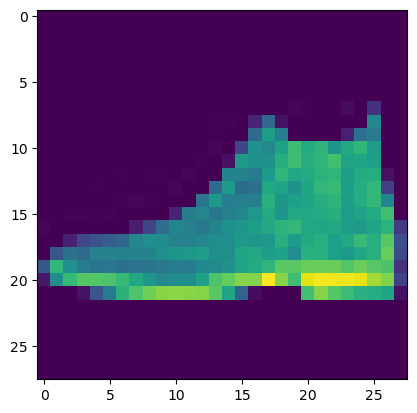

In [20]:
print(plt.imshow(X_test[0].reshape((28,28))))

In [21]:
del model

In [22]:
keras.backend.clear_session

<function keras.src.backend.clear_session()>

# POOLING vs NO POOLING

In [23]:
model_a=keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='ReLU',input_shape=(28,28,1)))
model_a.add(keras.layers.MaxPooling2D((2,2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300,activation='ReLU'))
model_a.add(keras.layers.Dense(100,activation='ReLU'))
model_a.add(keras.layers.Dense(10,activation='softmax'))


model_b=keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='ReLU',input_shape=(28,28,1)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300,activation='ReLU'))
model_b.add(keras.layers.Dense(100,activation='ReLU'))
model_b.add(keras.layers.Dense(10,activation='softmax'))

In [24]:
model_a.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
model_b.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [25]:
model_a.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 300)               1622700   
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                      

In [26]:
model_b.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 flatten_2 (Flatten)         (None, 21632)             0         
                                                                 
 dense_6 (Dense)             (None, 300)               6489900   
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 6521330 (24.88 MB)
Trainable params: 6521330 (24.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model_history_a=model_a.fit(X_train,y_train,epochs=3,batch_size=64,validation_data=(X_valid,y_valid))

Epoch 1/3
860/860 [==============================] - 17s 20ms/step - loss: 0.8857 - accuracy: 0.6926 - val_loss: 0.7588 - val_accuracy: 0.7276
Epoch 2/3
860/860 [==============================] - 17s 20ms/step - loss: 0.5358 - accuracy: 0.8058 - val_loss: 0.4907 - val_accuracy: 0.8146
Epoch 3/3
860/860 [==============================] - 17s 20ms/step - loss: 0.4768 - accuracy: 0.8279 - val_loss: 0.9134 - val_accuracy: 0.7050


In [28]:
model_history_b=model_b.fit(X_train,y_train,epochs=3,batch_size=64,validation_data=(X_valid,y_valid))

Epoch 1/3
860/860 [==============================] - 37s 43ms/step - loss: 0.7319 - accuracy: 0.7474 - val_loss: 0.7092 - val_accuracy: 0.7336
Epoch 2/3
860/860 [==============================] - 39s 46ms/step - loss: 0.4944 - accuracy: 0.8212 - val_loss: 0.4588 - val_accuracy: 0.8262
Epoch 3/3
860/860 [==============================] - 39s 45ms/step - loss: 0.4422 - accuracy: 0.8405 - val_loss: 0.9287 - val_accuracy: 0.7092
